## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ1_FFT20Pkt/test", 7, 12)
X_train = training_set.iloc[:, 2:].values
y_train = training_set.iloc[:, 1].values
test_set = get_single_dataset("training_data/Typ1_FFT20Pkt1/test")
X_test = test_set.iloc[:, 2:].values
y_test = test_set.iloc[:, 1].values

## Training the Random Forest Regression model

In [3]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

## Predicting the Test set results on independent test set

In [4]:
y_pred = regressor.predict(X_test)

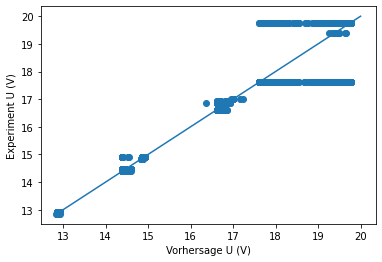

In [5]:
plt.scatter(y_pred, y_test)
plt.xlabel("Vorhersage U (V)")
plt.ylabel("Experiment U (V)")
plt.plot([13, 20], [13, 20])
plt.show()

In [6]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9479718189592775

In [7]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

0.4462265431974056


In [8]:
z = np.arange(1, 2766)

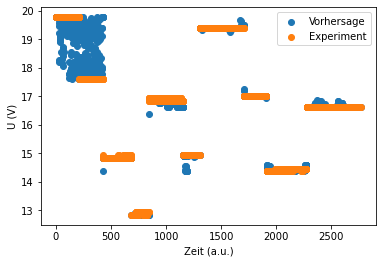

In [9]:
plt.scatter(z, y_pred, label='Vorhersage')
plt.scatter(z, y_test, label='Experiment')
plt.xlabel("Zeit (a.u.)")
plt.ylabel("U (V)")
plt.legend(loc='best')
plt.show()